<a href="https://colab.research.google.com/github/BilalAsifB/Learning-PyTorch/blob/main/notebooks/02_pytorch_NN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(torch.__version__)

2.9.0+cpu


In [81]:
RANDOM_SEED = 42
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [82]:
import sklearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [83]:
n_samples = 1000
x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=RANDOM_SEED)

In [84]:
circles = pd.DataFrame({'X1': x[:, 0],
                       'X2': x[:, 1],
                       'label': y})

In [85]:
circles[:11]

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


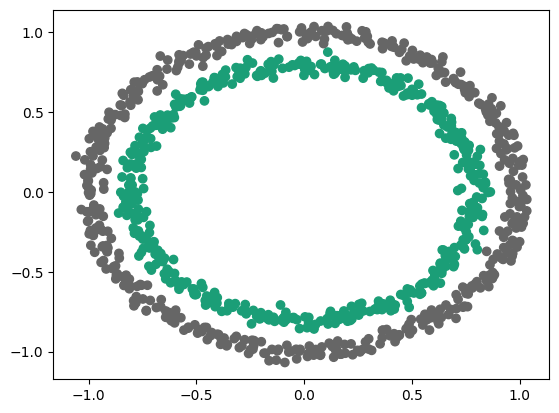

In [86]:
plt.scatter(x=circles['X1'],
            y=circles['X2'],
            c=y,
            cmap=plt.cm.Dark2_r)
plt.show()

In [87]:
x.ndim, x.shape

(2, (1000, 2))

In [88]:
y.ndim, y.shape

(1, (1000,))

In [89]:
x = torch.from_numpy(x).type(torch.float).to(DEVICE)
y = torch.from_numpy(y).type(torch.float).to(DEVICE)

x.dtype, y.dtype

(torch.float32, torch.float32)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)

In [91]:
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [92]:
class CircleClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=X_train.shape[1],
                                 out_features=3)
        self.layer_2 = nn.Linear(in_features=3,
                                 out_features=y_train.ndim)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_2(self.layer_1(x))

In [93]:
model = CircleClassificationModel().to(DEVICE)

In [94]:
model.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427]])),
             ('layer_1.bias', tensor([-0.3443,  0.4153,  0.6233])),
             ('layer_2.weight', tensor([[-0.4236,  0.5018,  0.1081]])),
             ('layer_2.bias', tensor([0.4266]))])

In [95]:
# Easier way to make a simple sequential model
model = nn.Sequential(
    nn.Linear(in_features=X_train.shape[1],
              out_features=3),
    nn.Linear(in_features=3,
              out_features=y_train.ndim),
).to(DEVICE)

In [96]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.0958,  0.3410],
                      [-0.0998,  0.5451],
                      [ 0.1045, -0.3301]])),
             ('0.bias', tensor([ 0.1802, -0.3258, -0.0829])),
             ('1.weight', tensor([[-0.2345,  0.3830, -0.4557]])),
             ('1.bias', tensor([-0.2662]))])

In [97]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model.parameters(),
                             lr=0.1)

In [98]:
torch.manual_seed(RANDOM_SEED)
epochs = 200

for epoch in range(epochs + 1):
    model.train()
    train_logits = model(X_train).squeeze()
    train_preds = torch.round(torch.sigmoid(train_logits))
    train_loss = loss_fn(train_logits, y_train)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)

    if epoch % 10 == 0:
        print(f'~ Epoch: {epoch}:\nTraining loss: {train_loss:.3} | Testing_loss: {test_loss:.3}')

~ Epoch: 0:
Training loss: 0.716 | Testing_loss: 0.701
~ Epoch: 10:
Training loss: 0.695 | Testing_loss: 0.696
~ Epoch: 20:
Training loss: 0.693 | Testing_loss: 0.694
~ Epoch: 30:
Training loss: 0.693 | Testing_loss: 0.695
~ Epoch: 40:
Training loss: 0.693 | Testing_loss: 0.694
~ Epoch: 50:
Training loss: 0.693 | Testing_loss: 0.695
~ Epoch: 60:
Training loss: 0.693 | Testing_loss: 0.695
~ Epoch: 70:
Training loss: 0.693 | Testing_loss: 0.695
~ Epoch: 80:
Training loss: 0.693 | Testing_loss: 0.695
~ Epoch: 90:
Training loss: 0.693 | Testing_loss: 0.695
~ Epoch: 100:
Training loss: 0.693 | Testing_loss: 0.695
~ Epoch: 110:
Training loss: 0.693 | Testing_loss: 0.695
~ Epoch: 120:
Training loss: 0.693 | Testing_loss: 0.695
~ Epoch: 130:
Training loss: 0.693 | Testing_loss: 0.695
~ Epoch: 140:
Training loss: 0.693 | Testing_loss: 0.695
~ Epoch: 150:
Training loss: 0.693 | Testing_loss: 0.695
~ Epoch: 160:
Training loss: 0.693 | Testing_loss: 0.695
~ Epoch: 170:
Training loss: 0.693 | Testi

In [109]:
import requests
from pathlib import Path

if not Path('helper_functions.py').is_file():
    request =  requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
    with open('helper_functions.py', 'wb') as f:
        f.write(request.content)

In [110]:
from helper_fucntions import plot_predictions, plot_decision_boundary

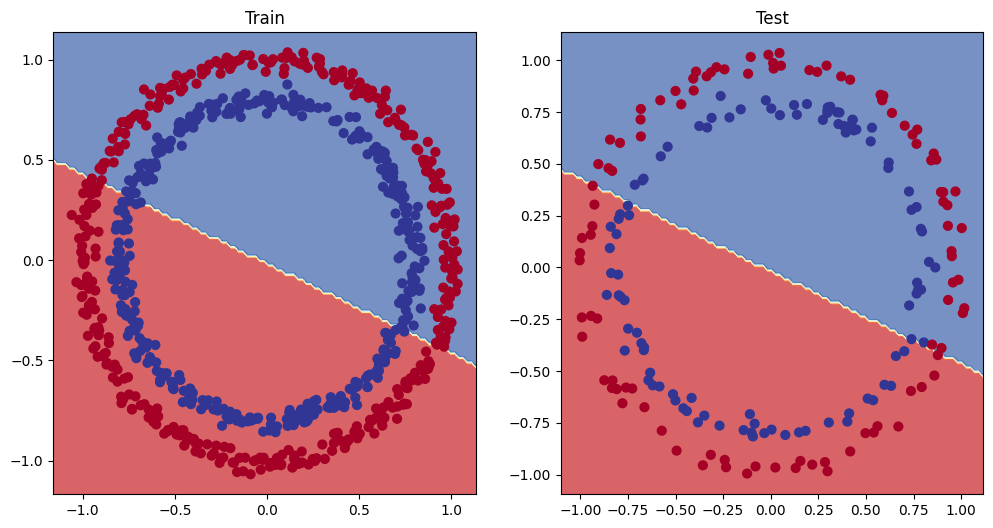

In [111]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model, X_test, y_test)